# HIERARCHICAL CLUSTERING

In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,ClienteID,Sexo,Edad,Ingresos Anuales (k$),Puntuacion de Gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Miramos el tamaño del Dataset
dataset.shape

(200, 5)

In [6]:
#Miramos estadisticas basicas
dataset.describe()

,ClienteID,Edad,Ingresos Anuales (k$),Puntuacion de Gastos (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#Miramos la cantidad de los valores nulos
dataset.isna().sum()

ClienteID                       0
Sexo                            0
Edad                            0
Ingresos Anuales (k$)           0
Puntuacion de Gastos (1-100)    0
dtype: int64

In [8]:
dataset.dropna()

,ClienteID,Sexo,Edad,Ingresos Anuales (k$),Puntuacion de Gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


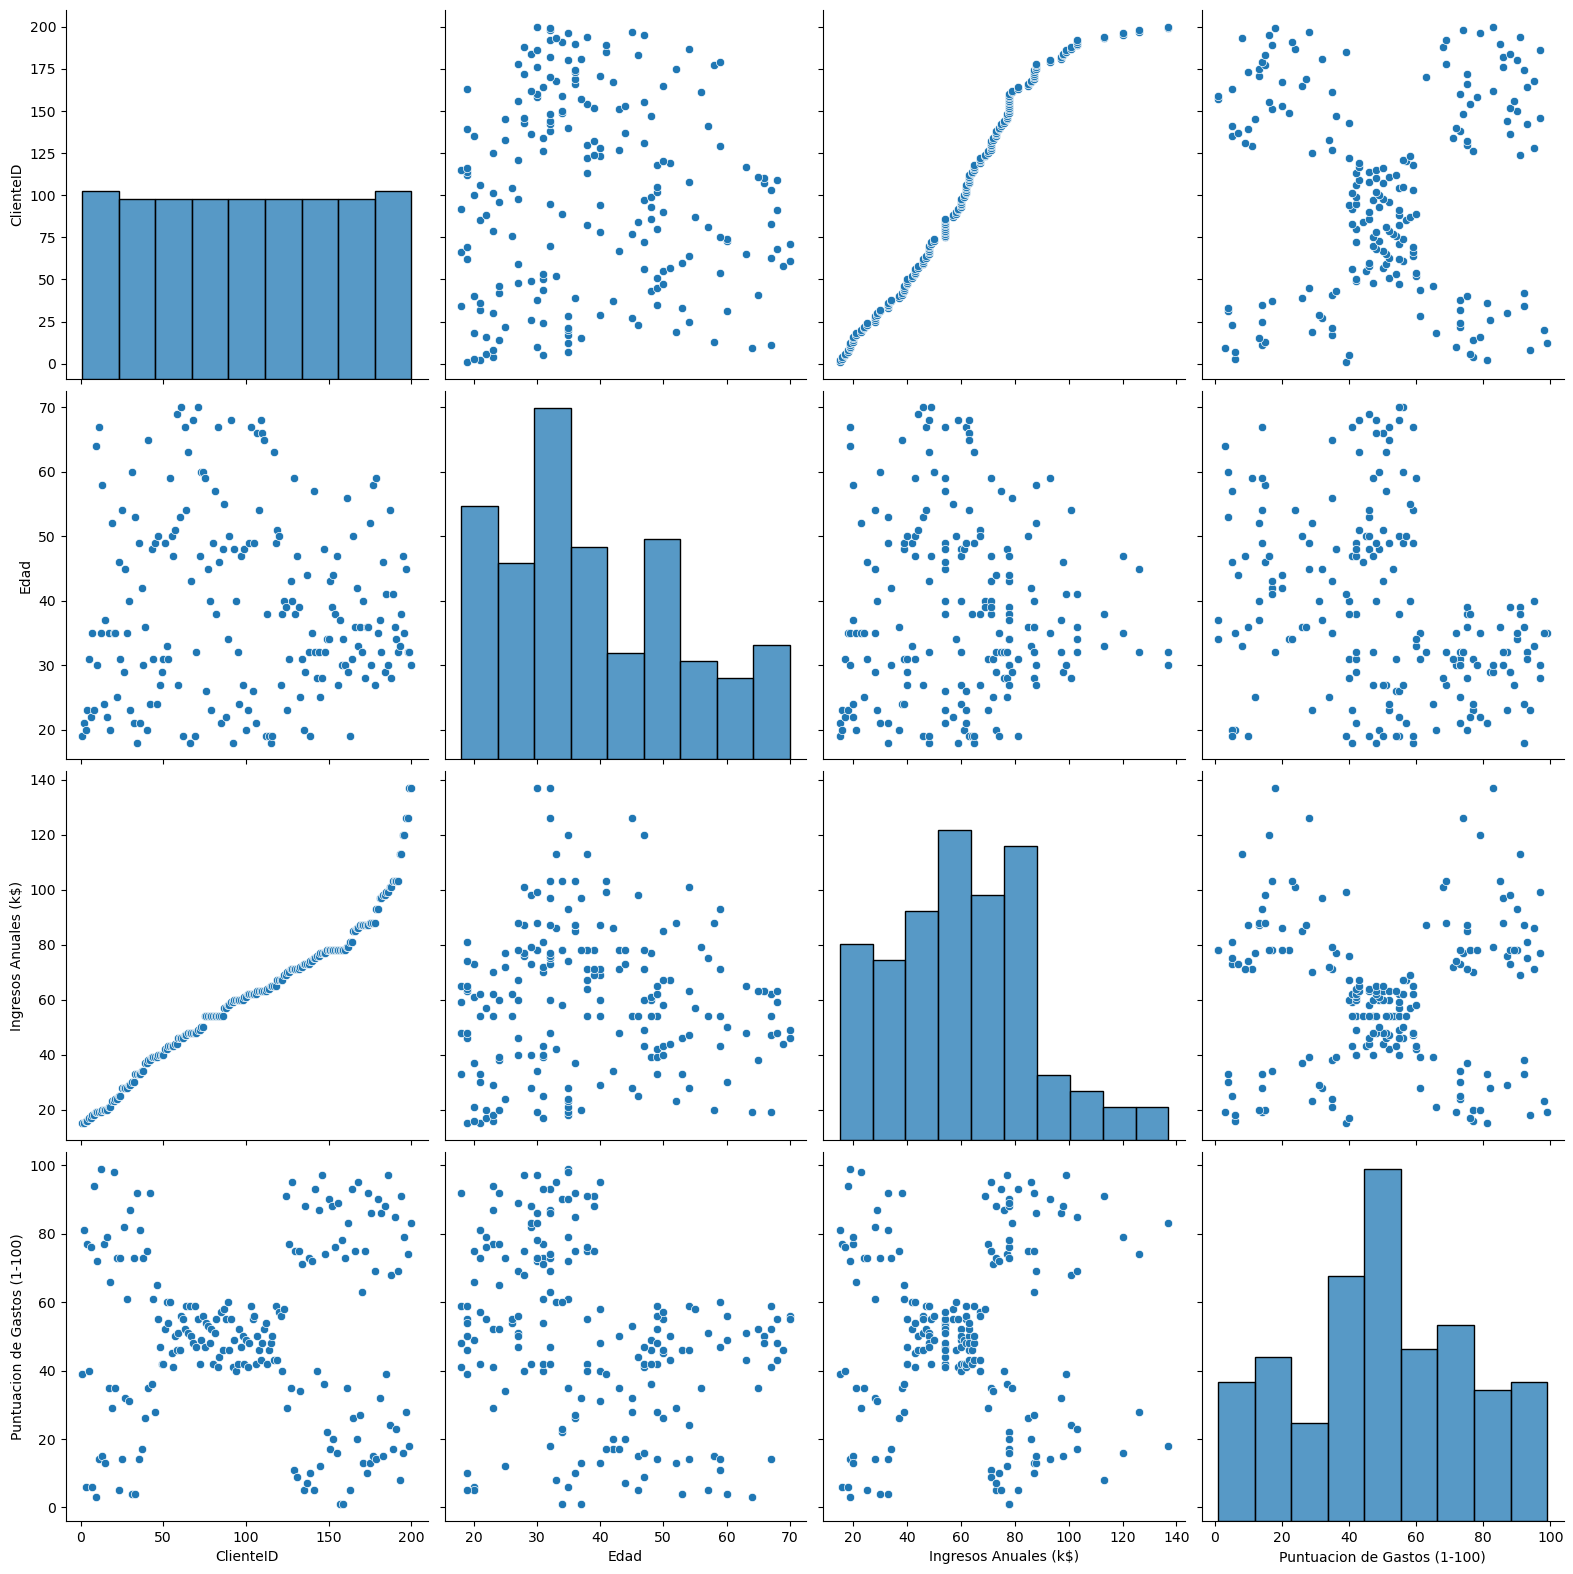

In [10]:
#Ejecutamos graficas
sns.pairplot(dataset.dropna(), size=4,kind='scatter')

<Axes: >

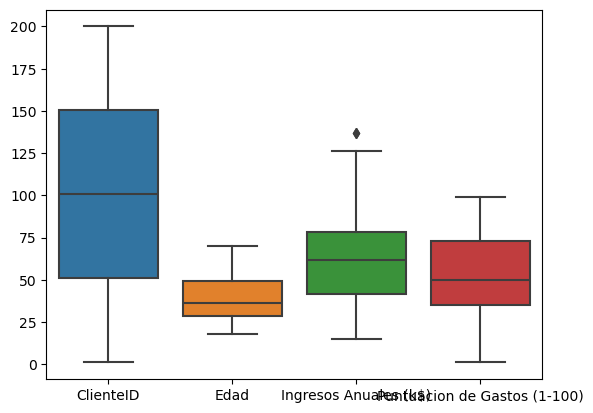

In [14]:
#Diagrama de caja de variable por especie
sns.boxplot(data=dataset)

In [28]:
# Definimos la matriz de características X
X = dataset[['Edad', 'Ingresos Anuales (k$)', 'Puntuacion de Gastos (1-100)']]

In [29]:
# Normalizamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

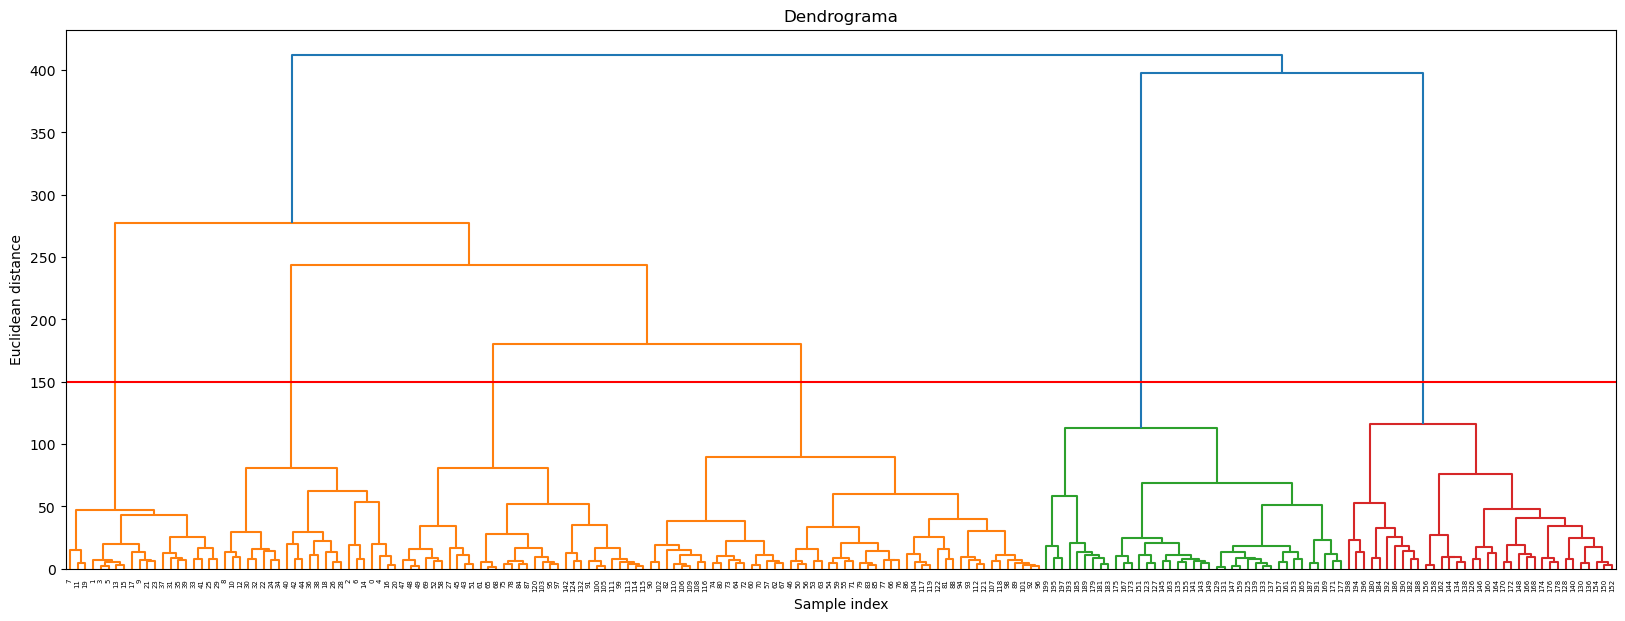

In [32]:
#Empezamos a aplicar el modelo HC(HIERARCHICAL CLUSTERING)
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 150, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [34]:
#Generamos el modelo aglomerativo
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [38]:
#Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

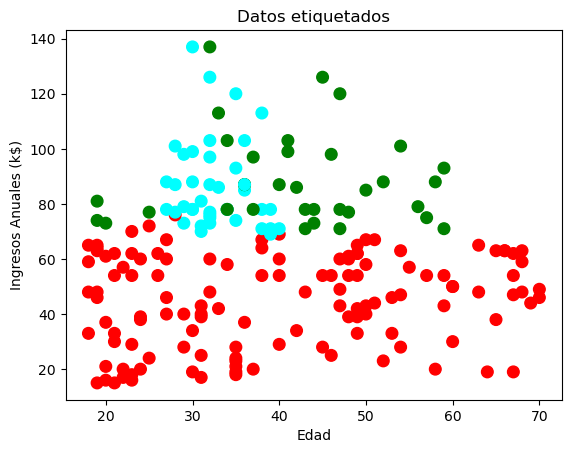

In [51]:
f1 = X['Edad'].values
f2 = X['Ingresos Anuales (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Edad')
plt.ylabel('Ingresos Anuales (k$)')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score
import numpy as np

# Creamos una lista para almacenar los valores del silhouette score
silhouette_scores = []

# Especificamos el rango de números de clusters que queremos probar
n_clusters_range = range(2, 15)

for n_clusters in n_clusters_range:
    # Creamos el modelo de clustering
    clustering_model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clustering_model.fit_predict(X)
    
    # Calculamos el silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Encontramos el número óptimo de clusters que maximiza el silhouette score
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
optimal_score = max(silhouette_scores)

print("Número óptimo de clusters según silhouette score:", optimal_n_clusters)
print("Silhouette score máximo alcanzado:", optimal_score)


Número óptimo de clusters según silhouette score: 6
Silhouette score máximo alcanzado: 0.4523566166018854


Text(0, 0.5, 'Media indices silouette')

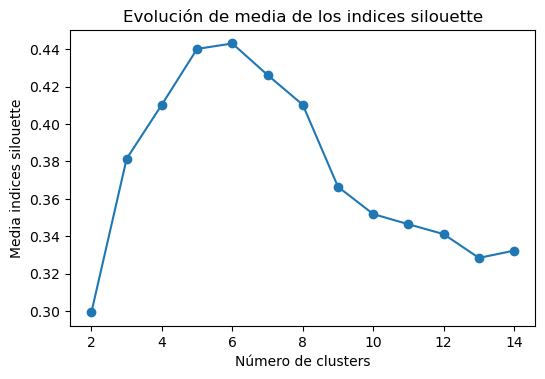

In [45]:
#Metodo silhouette para identificar el numero optimo de Clusteres
range_n_clusters = range(2,15)
valores_medios_silhouette =[]
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                affinity = 'euclidean',
                linkage = 'ward',
                n_clusters = n_clusters
            )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los indices silouette")
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Media indices silouette")

In [47]:
#Calcular medidad de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerarquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerarquico:
Puntaje de silueta: 0.38141795042544546
Indice de Calinski-Harabasz: 111.4623243273518
Davies-Bouldin Index: 0.8603032525623284


In [49]:
#Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
X_dist = pdist(X)
Z = linkage(X, 'ward')
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.66866802140347, array([277.42153431,  53.60747993, 277.42153431, ..., 397.74740753,
        18.27566688, 397.74740753]))
